<IPython.core.display.Javascript object>


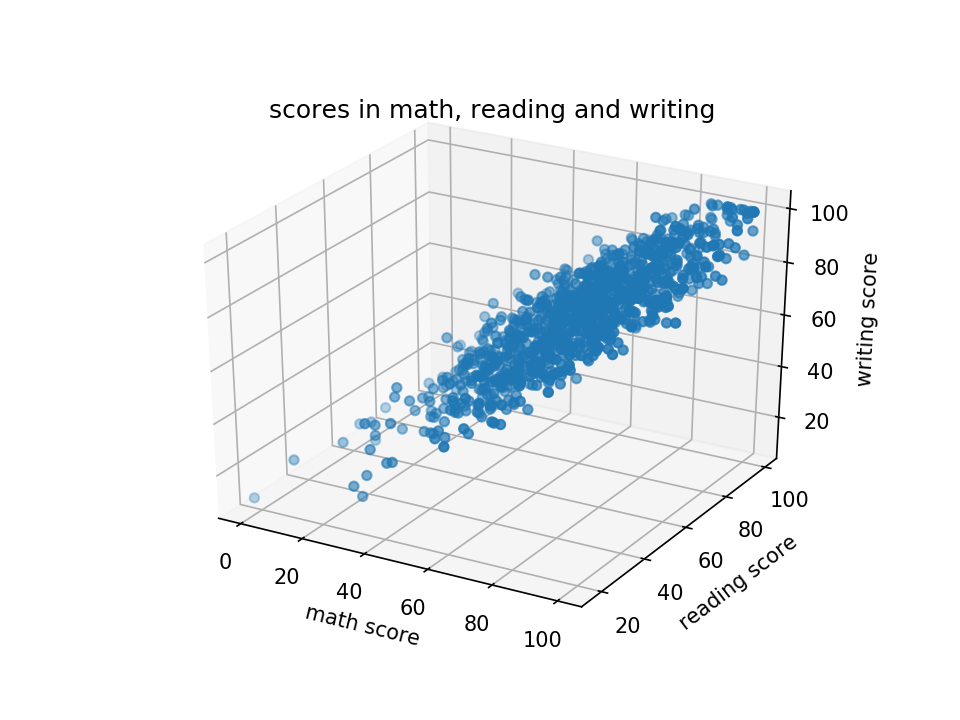

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# data from: https://www.kaggle.com/spscientist/students-performance-in-exams
df = pd.read_csv('data/StudentsPerformance.csv')

# plot the original data:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs = df['math score']
ys = df['reading score']
zs = df['writing score']
ax.scatter(xs, ys, zs, marker='o')
ax.set_xlabel('math score')
ax.set_ylabel('reading score')
ax.set_zlabel('writing score')
ax.set_title('scores in math, reading and writing')
plt.show()

# goal: reduce the 3 'score' columns to 2 principal components

Fundamental idea of dimensionality reduction via PCA: 

The higher the eigenvalue of the covariance matrix of the data X, the more important is the axis along the corresponding eigenvector, because the data is more distributed along that axis, and thus describes more variability of the data. X stores M many numerical features within the columns and contains N many observations in its rows.

We reduce the dimensionality of the data (we reduce the number of columns) by solely keeping the M_pca(=2) < M_original(=3) axis on which the data is distributed most. 

Downside: PCA makes the features less interpretable

<IPython.core.display.Javascript object>


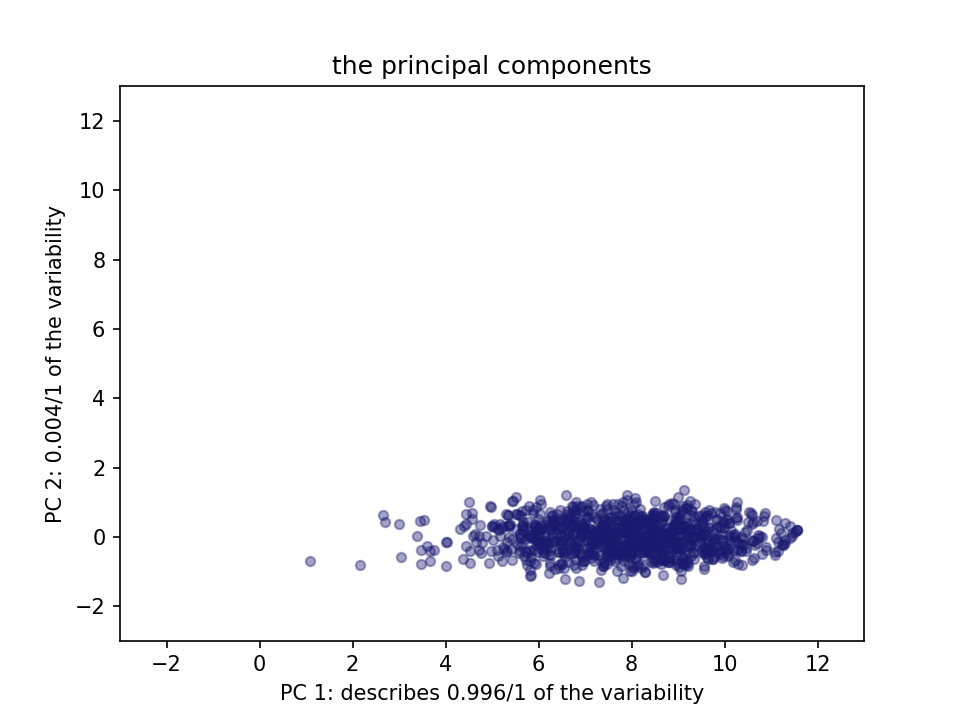

Text(0.5, 1.0, 'the principal components')

In [2]:
df_pca = df.loc[:, ['math score', 'reading score', 'writing score']]
num_pc = 2

# step 1: standardize the data and obtain X:
# subtract mean per column
df_pca.apply(lambda col: col - col.mean(), axis=0)
# divide by standard deviation per column
X = df_pca.apply(lambda col: col / col.std(), axis=0).values

# step 2: obtain the covariance matrix of X (up to a constant factor) via X.T@X
covmat = X.T @ X

# step 3_ obtain the eigenvalues via eigendecomposition of the covariance matrix
# NOTE: the resulting vectors in the columns of e_vec are already unit vectors)
# and the e_vals are already sorted in descending order (and their corresponding vectors accordingly)
e_val, e_vec = np.linalg.eig(covmat)

# obtain the reduced data by X @ e_vec*, where e_vec*:= the matrix of eigenvectors containing only the
# eigenvectors corresponding to the N largest eigenvalues:
pc = X @ e_vec[:, :num_pc]

# plot the resulting principal components:
var_pc = np.round(e_val / np.sum(e_val), 3)
df_plot = pd.DataFrame(pc, columns=['PC_1', 'PC_2'])
ax = df_plot.plot(kind='scatter', x='PC_1', y='PC_2', color='midnightblue', alpha=0.4)
ax.set_ylim(bottom=-3, top=13)
ax.set_xlim(left=-3, right=13)
ax.set_xlabel(f'PC 1: describes {var_pc[0]}/1 of the variability')
ax.set_ylabel(f'PC 2: {var_pc[1]}/1 of the variability')
ax.set_title('the principal components')

Usually, one would decide how many principal components one wants to keep by the values displayed in the Scree plot, i.e. a plot displaying the amount of variability explained by each principal axis.

TODO:SCREE PLOT

It turns out that it definitely makes sense to apply PCA to reduce the dimensions, since even reducing it to just one dimension covers more than 99% of the overall variability of the data. So it would even make sense to discard all dimensions but one.

### what else does this result tell us?

In [3]:
# TODO: better matrix visualization of covmat
covmat

array([[19995.93352455, 21465.55569049, 20321.66468088],
       [21465.55569049, 23443.28959294, 22170.79638734],
       [20321.66468088, 22170.79638734, 21056.10965674]])

In [4]:
pd.DataFrame(X).corr()

,0,1,2
0,1.000000,0.817580,0.802642
1,0.817580,1.000000,0.954598
2,0.802642,0.954598,1.000000


Since the covariances of all 3 features are positive, we can determine, that high values of one feature correlate with high values of the other features and vice versa. This is reflected by the high (pearson) correlations between the features. One can already see this relationship in plot 1. It allows us to reduce to two dimensions (or even one dimension) without losing too much information. 

According to this dataset, students are very  likely to obtain similar scores in all 3 disciplines.